In [23]:
import csv

In [24]:
import numpy as np

In [28]:
!curl https://cernbox.cern.ch/index.php/s/IjqoD2TnwFp0lQj/download > pr-stats.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 36111  100 36111    0     0  30996      0  0:00:01  0:00:01 --:--:-- 30996


In [29]:
!head -4 pr-stats.csv

pr number,lead time in days,author
6906,2.0950694444444444,dstocco
6907,0.21430555555555555,rpezzi
6908,0.7080902777777779,davidrohr


In [26]:
authors={}
authors["all"]=np.array([])
with open('pr-stats.csv') as cvsfile:
    r = csv.DictReader(cvsfile)
    for row in r:
        lead_time=float(row["lead time in days"])
        authors["all"]=np.append(authors["all"],lead_time)
        author=row["author"]
        if (not author in authors):
          authors[author]=np.array([])
        authors[author]=np.append(authors[author],lead_time) 

KeyError: 'lead time in days'

In [22]:
def printStat(author):
    array=authors[author]
    print("{:5d} PRs for {:20s} Lead times : max {:7.2f} mean {:7.2f} stddev {:7.2f}".format(np.size(array),author,np.max(array),np.mean(array),np.mean(array)))
printStat("all")
printStat("davidrohr")
printStat("shahor02")
printStat("aalkin")
printStat("aphecetche")
printStat("ktf")
printStat("dstocco")
printStat("sawenzel")
printStat("mconcas")

 1100 PRs for all                  Lead times : max  156.70 mean    4.09 stddev    4.09
  122 PRs for davidrohr            Lead times : max    5.74 mean    0.72 stddev    0.72
  172 PRs for shahor02             Lead times : max   15.17 mean    0.83 stddev    0.83
   30 PRs for aalkin               Lead times : max   12.18 mean    2.82 stddev    2.82
   34 PRs for aphecetche           Lead times : max   40.77 mean    5.76 stddev    5.76
  139 PRs for ktf                  Lead times : max   65.18 mean    2.40 stddev    2.40
   15 PRs for dstocco              Lead times : max   12.68 mean    3.29 stddev    3.29
   46 PRs for sawenzel             Lead times : max    3.76 mean    0.80 stddev    0.80
   14 PRs for mconcas              Lead times : max   22.61 mean    3.64 stddev    3.64


In [19]:
import matplotlib.pyplot as plt
delays=authors["all"]

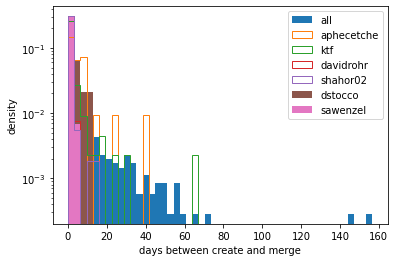

In [21]:
x_min=np.min(delays)
x_max=np.max(delays)
density=True
n,bins,patches=plt.hist(x=authors["all"],bins=np.linspace(x_min,x_max),rwidth=1.0,label="all",density=density,histtype='stepfilled')
plt.xlabel("days between create and merge");
plt.ylabel("density");
plt.yscale("log")
plt.hist(x=authors["aphecetche"],bins=bins,rwidth=0.85,label="aphecetche",density=density,histtype='step');
plt.hist(x=authors["ktf"],bins=bins,rwidth=0.85,label="ktf",density=density,histtype='step');
plt.hist(x=authors["davidrohr"],bins=bins,rwidth=0.85,label="davidrohr",density=density,histtype='step');
plt.hist(x=authors["shahor02"],bins=bins,rwidth=0.85,label="shahor02",density=density,histtype='step');
plt.hist(x=authors["dstocco"],bins=bins,rwidth=0.85,label="dstocco",density=density,histtype='stepfilled');
plt.hist(x=authors["sawenzel"],bins=bins,rwidth=0.85,label="sawenzel",density=density,histtype='stepfilled');

plt.legend();